In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime, date
from glob import glob
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
# name of file w/ topic counts
count_file = "allpapers-topics-pca.csv"

In [24]:
# load csv into pandas dataframe

df = pd.read_csv(count_file)
    
# csv has header row in format "Title" then each topic number 0-99
# each subesequent row is in format newspaper title, t00-proportion, t02-proportion etc.
# each row totals the number of articles in corpus of that paper
# each column totals the proportion of that topic in corpus   

In [25]:
# assign 
df_by_title = df.set_index('Title')

In [31]:
# look at topics that have high PMI with that paper. This is defined as:

# PMI(topic, title) = log P (topic, title) - log P (topic) - log P (title)
# variant of : https://github.com/jacobeisenstein/gt-css-class/blob/master/labs/lab6/Lab%206%20-%20Text%20over%20time.ipynb

# PMI functions 

# this computues $p(i)$ where $i$ is a topic
def get_p_topic(df_by_title): 
    df_tot = np.array(df_by_title.sum(axis=0))
    return df_tot / df_by_title.values.sum()

372276.000033557

In [33]:
P_base = get_p_topic(df_by_title)

Text(0,0.5,'proportion')

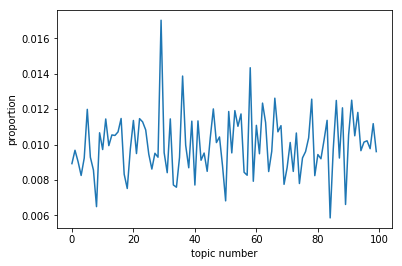

In [35]:
plt.plot(P_base)
plt.xlabel('topic number')
plt.ylabel('proportion')

In [38]:
P_base

array([0.00892085, 0.00967486, 0.00903311, 0.00825375, 0.00923003,
       0.01198359, 0.00928184, 0.00855736, 0.00649379, 0.01066207,
       0.00971555, 0.01144018, 0.00993668, 0.01053923, 0.01051152,
       0.01071135, 0.01146808, 0.0083228 , 0.00751864, 0.00974242,
       0.01135648, 0.0094892 , 0.01145929, 0.01127662, 0.01082314,
       0.00945497, 0.00861391, 0.00950493, 0.00928321, 0.01701171,
       0.00953742, 0.00841002, 0.01144483, 0.0077159 , 0.00758976,
       0.00927569, 0.01386266, 0.00996095, 0.00868777, 0.01131759,
       0.00771335, 0.01133194, 0.00911196, 0.00951823, 0.00848574,
       0.01038266, 0.01200802, 0.01010853, 0.01042696, 0.00877518,
       0.0068206 , 0.01186235, 0.00952629, 0.01191122, 0.01102754,
       0.01172413, 0.00843444, 0.00826619, 0.01433248, 0.00792597,
       0.01108089, 0.00947859, 0.01233584, 0.01123861, 0.00847403,
       0.00961687, 0.01261387, 0.01071497, 0.01106295, 0.00775298,
       0.0086996 , 0.01011364, 0.00848164, 0.01064854, 0.00779

In [43]:
print(P_base.argsort()[::-1]) # topics ranked highest to lowest
print(sorted(P_base)[::-1]) # their scores

[29 58 36 66 78 91 86 62 88 46  5 53 51 93 55 16 22 32 11 83 20 41 39 23
 63 98 60 68 54 24 67 15  9 73 13 90 14 92 48 45 77 82 96 95 71 47 37 12
 97 19 85 10  1 94 65 99 76 30 52 43 27 21 61 25 80 28  6 35 75 87  4 81
 42  2  0 49 70 38 26  7 44 72 64 56 31 17 57  3 79 59 74 69 33 40 34 18
 50 89  8 84]
[0.01701170858920032, 0.014332475272002614, 0.013862656500278856, 0.012613871367387952, 0.01255936952147478, 0.012500710941114962, 0.012486155498651544, 0.012335835491909353, 0.012069045583180216, 0.01200801675184822, 0.011983589450716318, 0.01191121978995502, 0.011862354488779652, 0.01181116568841841, 0.011724125446224235, 0.011468080590401117, 0.011459286166181706, 0.011444830301074864, 0.011440183070732742, 0.011363337015533317, 0.011356475129744891, 0.01133193924811359, 0.011317586230353867, 0.011276620562678202, 0.011238608726307539, 0.0111764511653906, 0.011080885681290651, 0.01106294815100023, 0.011027542104760847, 0.010823138395679036, 0.010714967903962215, 0.010711347331594193

In [176]:
# now compute p(paper) and p(topic,paper)

# first, get sum of all topics in each title -- essentially, sum of each row 
all_titles = list(df_by_title.index)
print(all_titles)

['DouglassMonthly', 'FrankLesliesWeekly', 'FrederickDouglassPaper', 'FreedomsJournal', 'GodeysLadysBook', 'NationalAntiSlaveryStandard', 'NationalCitizenandBallotBox', 'ProvincialFreeman', 'TheChristianRecorder', 'TheColoredAmerican', 'TheLiberator', 'TheLily', 'TheNationalEra', 'TheNorthStar', 'TheRevolution', 'WeeklyAdvocate']


In [181]:
def get_p_title(df_by_title):
    df_tot = np.array(df_by_title.sum(axis=1))
    return df_tot / df_by_title.values.sum()

P_title = get_p_title(df_by_title)

In [182]:
P_title

array([0.00461217, 0.12874319, 0.02847618, 0.00549861, 0.10421838,
       0.02392042, 0.00101538, 0.0134685 , 0.29626675, 0.01701157,
       0.26046267, 0.00679872, 0.08881045, 0.01731511, 0.00301121,
       0.00037069])

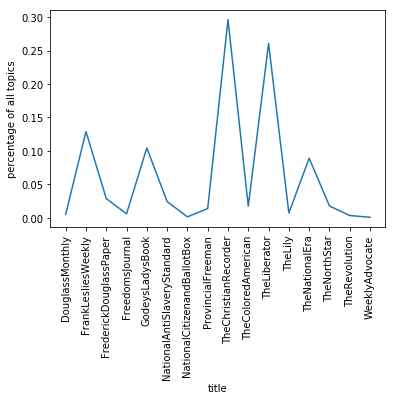

In [183]:
plt.plot(all_titles,P_title)
plt.xlabel('title')
plt.ylabel('percentage of all topics')
plt.xticks(rotation=90);

In [165]:
# now compute PMI

all_titles.index('TheLily')
# all_titles.index('DouglassMonthly')


11

In [190]:
df_by_title.values

array([[1.32228921e+01, 1.20460886e+01, 1.04868153e+01, ...,
        8.74411367e+00, 1.28909648e+01, 1.06994582e+01],
       [4.30993076e+02, 3.15826173e+02, 4.41441991e+02, ...,
        2.58668324e+02, 7.20755608e+02, 7.02031975e+02],
       [1.00125868e+02, 9.27928772e+01, 8.70269953e+01, ...,
        5.99516044e+01, 1.11180548e+02, 8.72382695e+01],
       ...,
       [5.86834389e+01, 5.15441067e+01, 6.80331639e+01, ...,
        3.75031980e+01, 8.52969111e+01, 5.45665226e+01],
       [1.58121465e+01, 1.25300628e+01, 1.00967794e+01, ...,
        4.42388198e+00, 1.18402188e+01, 6.98931480e+00],
       [1.14027659e+00, 1.48346919e+00, 1.03196180e+00, ...,
        6.75950979e-01, 1.30281330e+00, 1.38731579e+00]])

In [192]:
idx_TL = all_titles.index('TheLily')

df_by_title.values[idx_TL,:]

array([ 50.01755207,  27.08003602,  38.95081889,  12.55374974,
        19.06692745,  23.4788048 ,  12.22132996,  17.92144298,
        14.02141441,  12.11875087,  15.15591299,  20.65083055,
        11.73042586,  27.8073961 ,  23.23629048,  30.18653599,
        65.71252779,  16.23694455,  11.36741228,  20.13806856,
        38.29221493,  10.51220158,  24.77829701,  29.98289684,
        25.57900903,  21.36103424,  12.988549  ,  22.6627732 ,
        10.88944579,  77.10130156,  13.78786172,  10.23921456,
        11.13248763, 114.7671969 ,  15.79669374,  14.44915619,
         9.34786722,  19.62974416,  14.52515214,  16.60349932,
        22.2319874 ,  36.85779962,   9.44449788,  14.95994991,
         6.51618547,  31.85470244,  87.64256853,  17.36121844,
        17.17817993,  18.30530092,  15.85923178,  23.94906211,
        22.69728043,  34.20799759,  48.60981547,  15.23004447,
        16.29593646,  14.20913312,  12.30583463, 129.9941191 ,
        16.22680475,  13.56522327,  34.18956191,  14.52

In [193]:
df_by_title.values.sum()

372276.000033557

In [194]:
idx_TL = all_titles.index('TheLily')
pmi_TL = np.log(df_by_title.values[idx_TL,:]/df_by_title.values.sum()) - np.log(P_base) - np.log(P_title[idx_TL])



In [195]:
pmi_TL

array([ 0.7953682 ,  0.10065105,  0.53278902, -0.5092628 , -0.20312161,
       -0.25605456, -0.6534919 , -0.18940813, -0.15887511, -0.80055346,
       -0.4839517 , -0.33799093, -0.76266162,  0.04158305, -0.13537069,
        0.10747784,  0.81710753, -0.26032362, -0.51524857, -0.20249243,
        0.28684405, -0.82623231, -0.15744675,  0.04928103, -0.06852871,
       -0.11358619, -0.51792521, -0.05970107, -0.76902797,  0.58260383,
       -0.56004893, -0.73181335, -0.95628496,  1.77100871, -0.19561437,
       -0.48537579, -1.32266491, -0.25024058, -0.41464862, -0.54535883,
        0.12996448,  0.25082755, -0.89277023, -0.47644667, -1.19271204,
        0.19243334,  1.05907785, -0.38775504, -0.42936935, -0.19335053,
       -0.08481045, -0.22605522, -0.06042441,  0.12636419,  0.55481502,
       -0.66699312, -0.27002144, -0.38690293, -1.08106893,  1.86873004,
       -0.54717161, -0.57014084,  0.09079743, -0.67179467, -0.59238712,
        0.14827048, -0.62705682, -0.54003789, -0.1404389 , -0.83

In [196]:
print(pmi_TL.argsort()[::-1]) # topics ranked highest pmi to lowest
print(sorted(pmi_TL)[::-1]) # their scores

[59 33 46 83 16  0 79 85 71 94 88 29 54  2 82 86 98 20 41 45 65 40 53 15
  1 73 62 96 23 13 90 27 52 24 50 87 25 14 68 22  8 76  7 49 34 19  4 99
 51 89 37  5 17 56 72 11 91 81 57 47 38 48 43 10 77 35 74  3 18 70 26 67
 39 60 30 61 64 66 84  6 97 55 63 31 12 28  9 80 21 95 69 42 32 93 58 78
 75 44 36 92]
[1.8687300412052572, 1.771008706427649, 1.0590778509535204, 0.9266283818124377, 0.8171075319433534, 0.7953682031721652, 0.7805446411744885, 0.6250245825473311, 0.6215033249509538, 0.6050679075682126, 0.5951231207662593, 0.5826038326619845, 0.5548150220749015, 0.5327890210094504, 0.461622898057545, 0.3491862543572859, 0.33319940396389214, 0.28684405102794486, 0.25082755229924025, 0.19243334107009957, 0.1482704775988104, 0.129964482525061, 0.1263641872827721, 0.10747783731459748, 0.10065105104443361, 0.1004022470402628, 0.09079742735881968, 0.056414023598795104, 0.049281026389048854, 0.04158304885320696, -0.00909390474870797, -0.0597010665276434, -0.060424411560494384, -0.068528712737983

In [202]:
def get_pmi_by_title(df_by_title,P_base,P_title,title):
    idx = list(df_by_title.index).index(title)
    
    pmi = np.log(df_by_title.values[idx,:]/df_by_title.values.sum()) - np.log(P_base) - np.log(P_title[idx])
    return pmi

get_pmi_by_title(df_by_title,P_base,P_title,'TheLily')
    

array([ 0.7953682 ,  0.10065105,  0.53278902, -0.5092628 , -0.20312161,
       -0.25605456, -0.6534919 , -0.18940813, -0.15887511, -0.80055346,
       -0.4839517 , -0.33799093, -0.76266162,  0.04158305, -0.13537069,
        0.10747784,  0.81710753, -0.26032362, -0.51524857, -0.20249243,
        0.28684405, -0.82623231, -0.15744675,  0.04928103, -0.06852871,
       -0.11358619, -0.51792521, -0.05970107, -0.76902797,  0.58260383,
       -0.56004893, -0.73181335, -0.95628496,  1.77100871, -0.19561437,
       -0.48537579, -1.32266491, -0.25024058, -0.41464862, -0.54535883,
        0.12996448,  0.25082755, -0.89277023, -0.47644667, -1.19271204,
        0.19243334,  1.05907785, -0.38775504, -0.42936935, -0.19335053,
       -0.08481045, -0.22605522, -0.06042441,  0.12636419,  0.55481502,
       -0.66699312, -0.27002144, -0.38690293, -1.08106893,  1.86873004,
       -0.54717161, -0.57014084,  0.09079743, -0.67179467, -0.59238712,
        0.14827048, -0.62705682, -0.54003789, -0.1404389 , -0.83

In [205]:
for title in list(df_by_title.index):
    pmi = get_pmi_by_title(df_by_title,P_base,P_title,title)
    
    print("===", title, "===")
    print(pmi.argsort()[::-1][:10]) # topics ranked highest pmi to lowest
    print(sorted(pmi)[::-1][:10]) # their scores
 

=== DouglassMonthly ===
[44 92 69 40  9 84 12 93 14 77]
[1.7834017935156625, 1.7519098382553775, 1.637410301966149, 0.8506160810171233, 0.7523375579805363, 0.7501847763912091, 0.6830503501513192, 0.6238138435021359, 0.5451715387068354, 0.4701446857720821]
=== FrankLesliesWeekly ===
[75 21 43  6 30 70  3 93 61 28]
[1.4505875613336787, 1.2257010795282497, 1.1319350002991806, 1.0559963072160503, 0.9394268739597518, 0.8844433853723208, 0.8830091973944727, 0.8390984448674157, 0.8056879160701325, 0.5097432961000363]
=== FrederickDouglassPaper ===
[14  9 12 66 55 90  5 71 51 22]
[0.6727645587099493, 0.5510206073336246, 0.5399387485467173, 0.5000897203207355, 0.47033646750877356, 0.436875755008872, 0.378412244629315, 0.36548712615124046, 0.35606385135764107, 0.33862002371002564]
=== FreedomsJournal ===
[45 39 29 31 27 57 28  0  9 83]
[1.201528227385925, 0.8963305905148662, 0.6422755541966154, 0.609306168811937, 0.607716409054869, 0.5811993224538421, 0.5738805540055889, 0.44855612438255754, 0.4

In [206]:
# print same thing to file
fout = open("pmi.txt","w")

for title in list(df_by_title.index):
    pmi = get_pmi_by_title(df_by_title,P_base,P_title,title)
    
    print("===", title, "===", file=fout)
    print(pmi.argsort()[::-1][:10], file=fout) # topics ranked highest pmi to lowest
    print(sorted(pmi)[::-1][:10], file=fout) # their scores
    
fout.close()
    

In [ ]:
# now do cosine similarity on all combos of papers -- to here

np.zeros(X_all_years.shape[0]-1)

for i,X_year in enumerate(X_all_years[:-1,]):
    corr[i] = X_year.dot(X_all_years[i+1,]) / ((np.linalg.norm(X_year)) * (np.linalg.norm(X_all_years[i+1,])))

